## Observations and Insights 

In [307]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [308]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [309]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

In [310]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [311]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.set_index('Mouse ID')
clean_df = clean_df.drop('g989', axis=0)
clean_df.reset_index(inplace=True)

In [312]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [313]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stat_df = pd.DataFrame( { 'Mean' : summary_mean,
                     'Median': summary_median,
                     'Variance': summary_variance,
                     'Std. Deviation': summary_std,
                     'SEM': summary_sem
    
}
)
summary_stat_df

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Measurements')

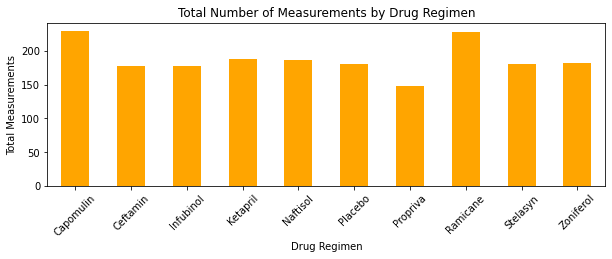

In [314]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
tot_measurements = clean_df.groupby('Drug Regimen').count()
tot_measurements.rename(columns= {'Tumor Volume (mm3)': 'Total Measurements'}, inplace=True)
measurement_bar = tot_measurements['Total Measurements']
measurement_bar = measurement_bar.plot(kind='bar', figsize=(10,3), facecolor='orange', rot=45, title='Total Number of Measurements by Drug Regimen')
measurement_bar.set_ylabel('Total Measurements')


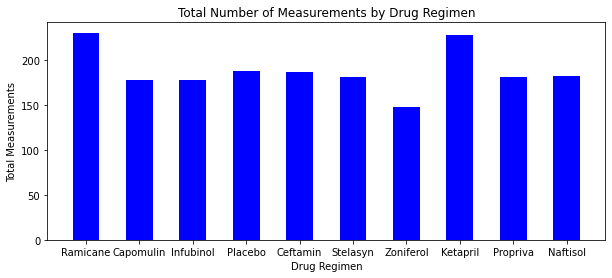

In [315]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen = clean_df['Drug Regimen'].value_counts()
regimen2 = clean_df.drop_duplicates(['Drug Regimen'], keep='first')
regimen_list = regimen2['Drug Regimen'].tolist()
x_axis = np.arange(len(regimen))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,4))
plt.bar(x_axis, tot_measurements['Total Measurements'], color="b", width=.5)
plt.xticks(tick_locations, regimen_list)
plt.title('Total Number of Measurements by Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9EE86E198>],
      dtype=object)

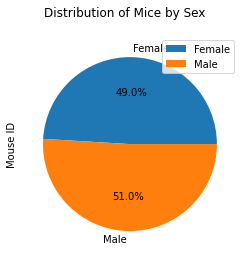

In [316]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_df[['Mouse ID', 'Sex']]
gender_group = gender_df.groupby(['Sex']).count()
gender_group.plot(kind='pie', subplots=True, autopct='%1.1f%%', title='Distribution of Mice by Sex')

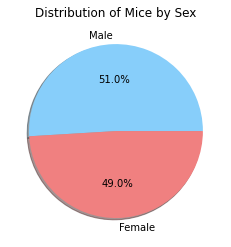

In [317]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_df['Sex'].value_counts()
sex2 = clean_df.drop_duplicates(['Sex'], keep='first')
labels = sex2['Sex']
sizes = clean_df['Sex'].value_counts().tolist()
colors = ['lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Mice by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [318]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby(['Mouse ID']).max()
last_timepoint_df2 = pd.DataFrame(last_timepoint_df['Timepoint'])
last_timepoint_df2
    

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_merge = pd.merge(clean_df, last_timepoint_df2, on='Mouse ID')
last_timepoint_merge.rename(columns= {'Timepoint_y': 'Max Timepoint'}, inplace=True)
last_timepoint_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [319]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for reg in treatment: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol_tumor = last_timepoint_merge.loc[last_timepoint_merge['Drug Regimen']== reg]['Tumor Volume (mm3)']
    
    # add subset 
    vol_data.append(vol_tumor)
    quartiles = vol_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = vol_tumor.loc[(vol_tumor < lower_bound) | (vol_tumor > upper_bound)]
    print(reg, outlier)

Capomulin 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(*args, **kw)>

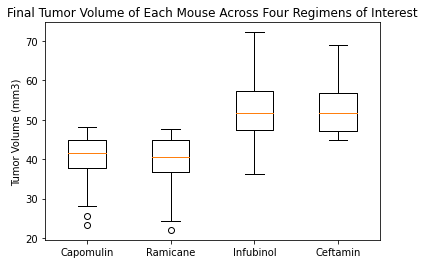

In [320]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(vol_data, labels= treatment)
plt.show

## Line and Scatter Plots

In [321]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# set index to Drug Regimen and sort ascending to identify and select a mouse treated with Capomulin
drug_index = clean_df.set_index('Drug Regimen')
drug_index.sort_values('Drug Regimen', ascending=True)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,v923,Female,19,21,30,40.752216,2
Capomulin,g316,Female,22,22,35,44.702833,2
Capomulin,g316,Female,22,22,30,44.221480,2
Capomulin,g316,Female,22,22,25,46.809225,1
Capomulin,g316,Female,22,22,20,45.933322,1
...,...,...,...,...,...,...,...
Zoniferol,o926,Male,15,29,40,59.903044,3
Zoniferol,o926,Male,15,29,35,58.593993,3
Zoniferol,o926,Male,15,29,30,56.917398,3


In [322]:
# create new dataframe for selected mouse
mouse_df = clean_df.loc[clean_df['Mouse ID'] == 'g316']
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


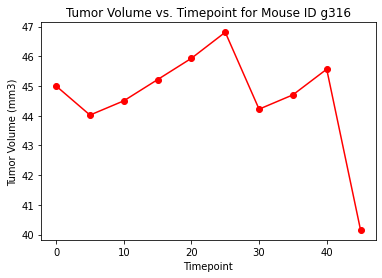

In [323]:
#create line plot 
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o', color='r')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint for Mouse ID g316')
plt.show()

In [324]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#create new df with necessary columns
capomulin_df = clean_df[['Mouse ID', 'Drug Regimen', 'Weight (g)', 'Tumor Volume (mm3)']]
# filter for capomulin
capomulin_df =  capomulin_df.loc[capomulin_df['Drug Regimen'] == 'Capomulin']
#groupby mouse ID and calculate the average volume
capomulin_group_avg_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
#rename column header
capomulin_group_avg_vol = capomulin_group_avg_vol.reset_index()
capomulin_group_avg_vol = capomulin_group_avg_vol.rename(columns= {'Tumor Volume (mm3)': 'Avg Tumor Volume'})
#merge new df that contains average volume with df filtered for capomulin
capomulin_merged = pd.merge(capomulin_df, capomulin_group_avg_vol, on='Mouse ID')
capomulin_merged

,Mouse ID,Drug Regimen,Weight (g),Tumor Volume (mm3),Avg Tumor Volume
0,s185,Capomulin,17,45.000000,34.559143
1,s185,Capomulin,17,43.878496,34.559143
2,s185,Capomulin,17,37.614948,34.559143
3,s185,Capomulin,17,38.177232,34.559143
4,s185,Capomulin,17,36.866876,34.559143
...,...,...,...,...,...
225,i557,Capomulin,24,47.685963,44.805810
226,r157,Capomulin,25,45.000000,45.798970
227,r157,Capomulin,25,45.597064,45.798970
228,r157,Capomulin,25,46.059608,45.798970


Text(0, 0.5, 'Avg Tumor Volume')

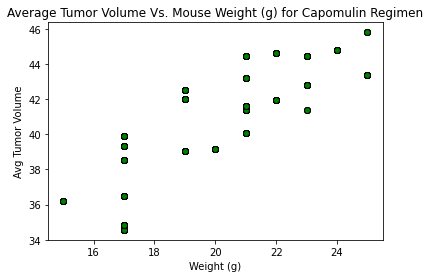

In [325]:
#create the scatter plot
x_values = capomulin_merged['Weight (g)']
y_values = capomulin_merged['Avg Tumor Volume']
plt.scatter(x_values, y_values, marker='o', facecolor='green', edgecolor='black')
plt.title('Average Tumor Volume Vs. Mouse Weight (g) for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume')

## Correlation and Regression

In [326]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_merged.iloc[:,2]
avg_tvol = capomulin_merged.iloc[:,4]
correlation = st.pearsonr(avg_tvol,weight)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.83


The r-squared is: 0.6962164535925321


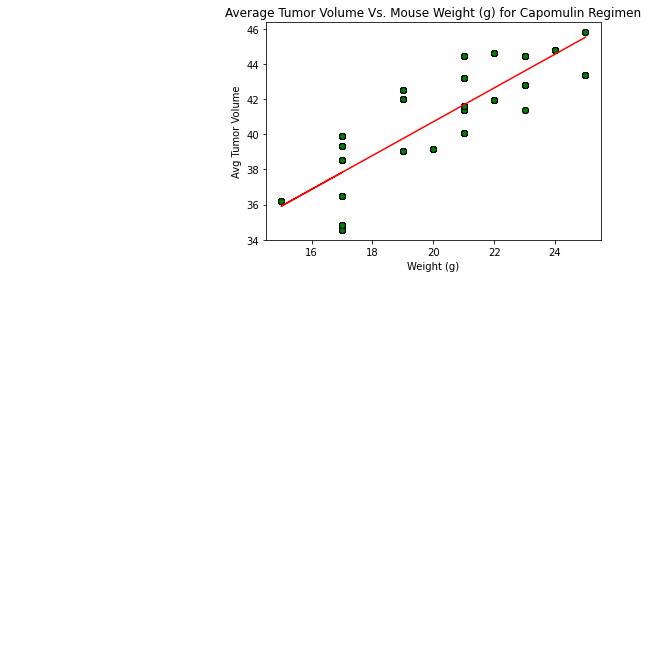

In [327]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolor='green', edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Average Tumor Volume Vs. Mouse Weight (g) for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume')
print(f"The r-squared is: {rvalue**2}")

In [329]:
print('Three Observations:')
print('1. Generally, average tumor size is higher in heavier mice within the population on the Capomulin Regimen.')
print('2. There are more male mice than female within the total population.')
print('3. Ramicane has the lowest average tumor volume. ')

Three Observations:
1. Generally, average tumor size is higher in heavier mice within the population on the Capomulin Regimen.
2. There are more male mice than female within the total population.
3. Ramicane has the lowest average tumor volume. 
